# 数据集分布的可视化

In [12]:
%matplotlib inline

In [13]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
sns.__version__

'0.8.1'

In [15]:
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))  # 随机数生成种子

## 单变量分布图

### 直方图

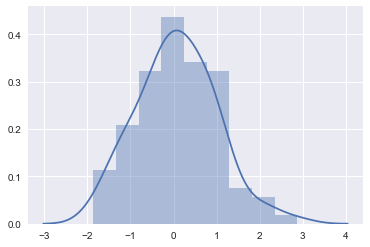

In [16]:
x = np.random.normal(size=100)
sns.distplot(x);

In [19]:
# sns.distplot?

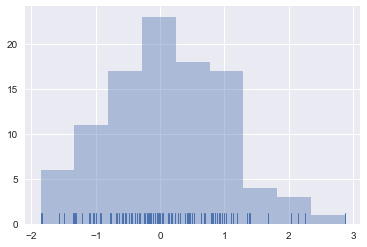

In [18]:
sns.distplot(x, kde=False, rug=True);

# kde, 是否画核密度曲线
# rug，是否将数组中的数据点画出来作为坐标轴的刻度线

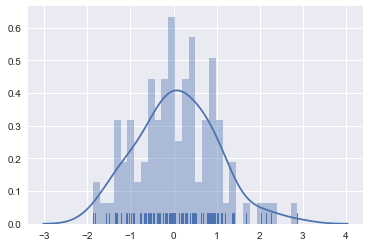

In [21]:
# 自定义组数
sns.distplot(x, bins=30, kde=True, rug=True);

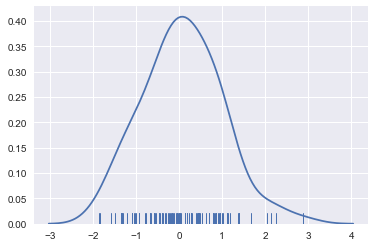

In [22]:
sns.distplot(x, hist=False, rug=True);

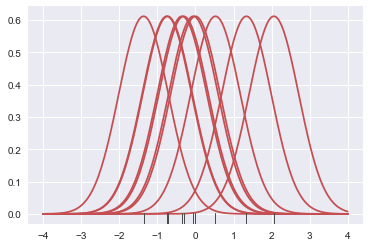

In [26]:
x = np.random.normal(0, 1, size=10)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:
    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")  # matplotlib 直接绘图核密度曲线

sns.rugplot(x, color=".3", linewidth=1);

In [27]:
# sns.rugplot?
# 将数组中的数据点画出来作为坐标轴的刻度线

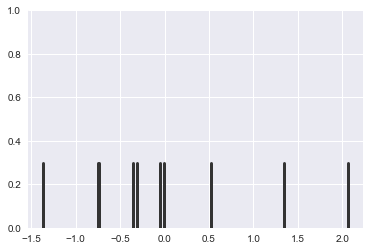

In [28]:
sns.rugplot(x, color=".2", height=0.3, linewidth=3);

In [30]:
len(kernels[0])

200

In [31]:
density = np.sum(kernels, axis=0)
density.shape

(200,)

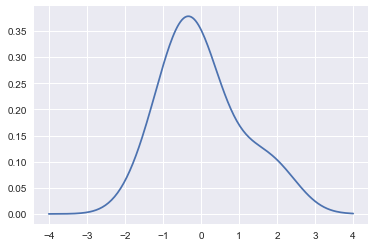

In [32]:
density /= integrate.trapz(density, support) # 使用复合梯形法则沿着给定的轴进行积分
plt.plot(support, density);

### 核密度估计图

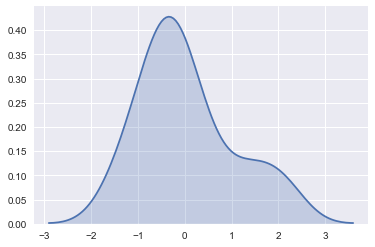

In [33]:
sns.kdeplot(x, shade=True);

In [35]:
# sns.kdeplot?

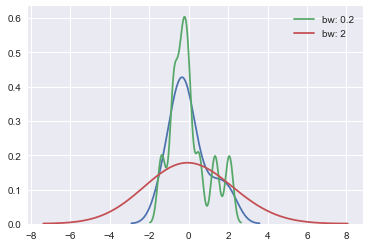

In [36]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

### 拟合参数分布

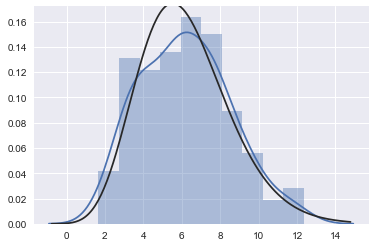

In [40]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=True, fit=stats.gamma);

## 二元分布图

In [41]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
df.head()

,x,y
0,-0.167552,-0.161169
1,-0.105026,0.259424
2,-0.434865,0.794962
3,1.707337,1.431573
4,0.710896,1.972702


### 散点图

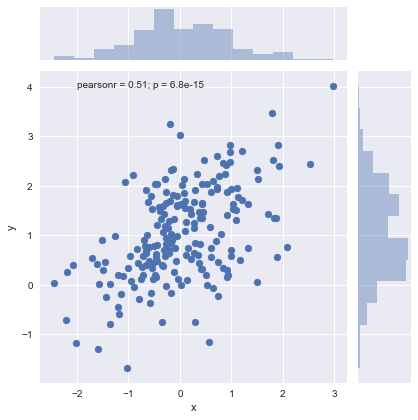

In [42]:
sns.jointplot(x="x", y="y", data=df);

In [45]:
# sns.jointplot?
# kind: { "scatter" | "reg" | "resid" | "kde" | "hex" }

In [195]:
# sns.JointGrid?

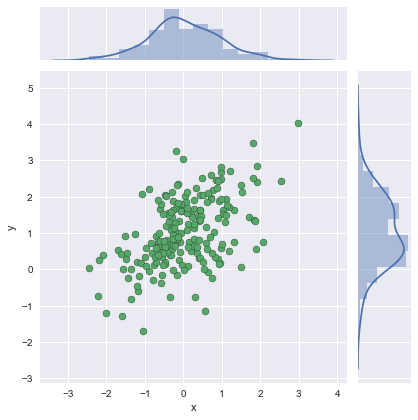

In [44]:
g = sns.JointGrid(x="x", y="y", data=df)
g = g.plot_joint(plt.scatter, color="g", edgecolor="k")
g = g.plot_marginals(sns.distplot, kde=True, color="b")

### Hexbin 图

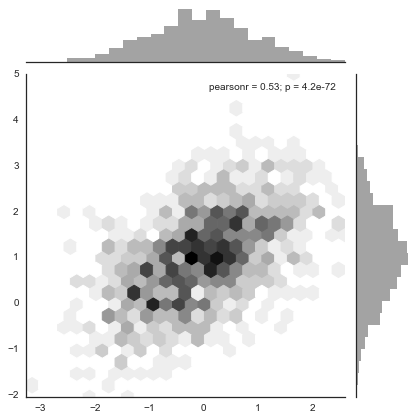

In [48]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k")
#     plt.title('Hexbin chart')

### 核密度估计

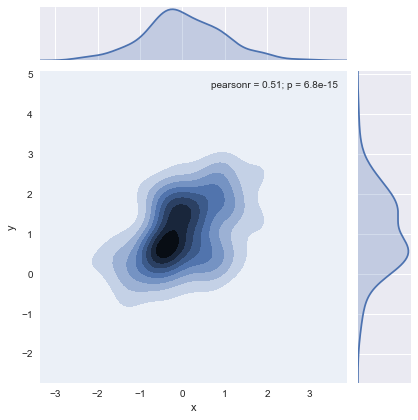

In [49]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

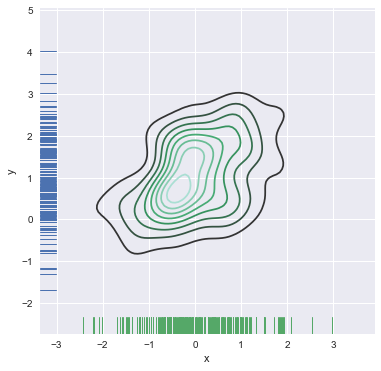

In [51]:
# 二变量的核密度估计图
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

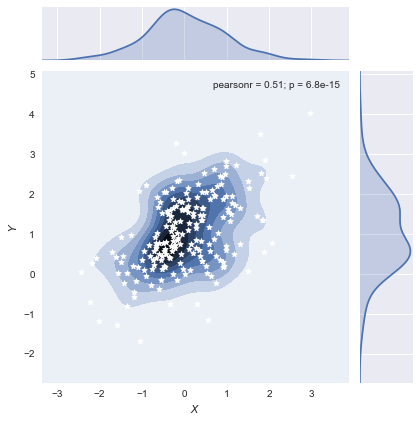

In [53]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="*")
g.set_axis_labels("$X$", "$Y$");

## 可视化数据集中成对的关系

### pairplot

In [54]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


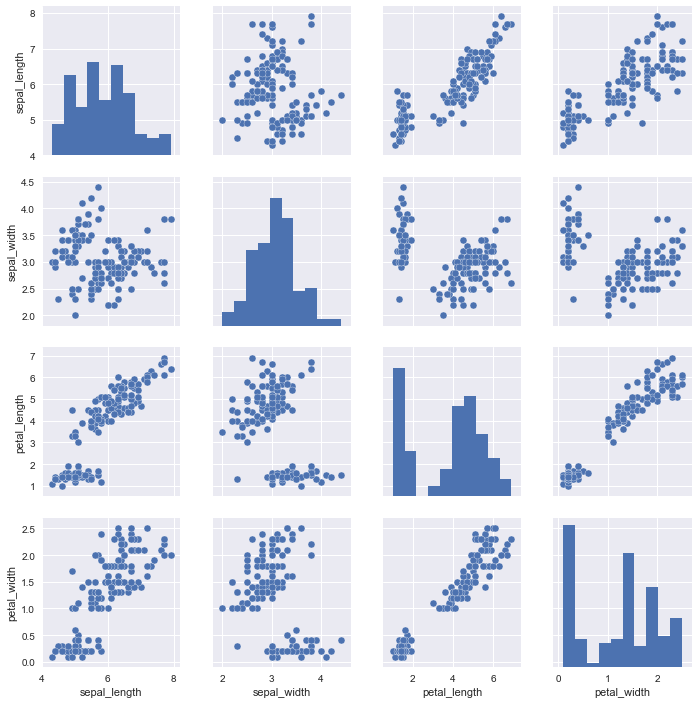

In [55]:
sns.pairplot(iris);

In [56]:
# sns.pairplot?

### PairGrid

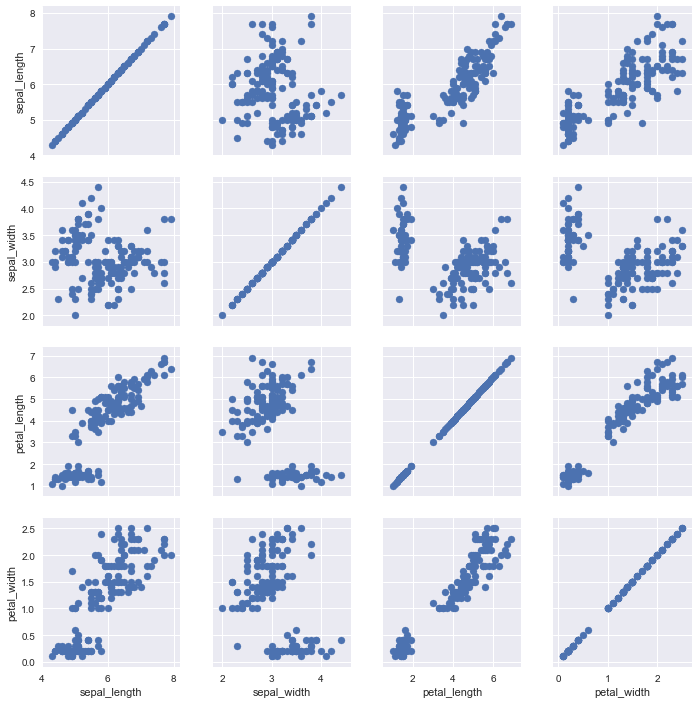

In [57]:
g = sns.PairGrid(iris)
g.map(plt.scatter);

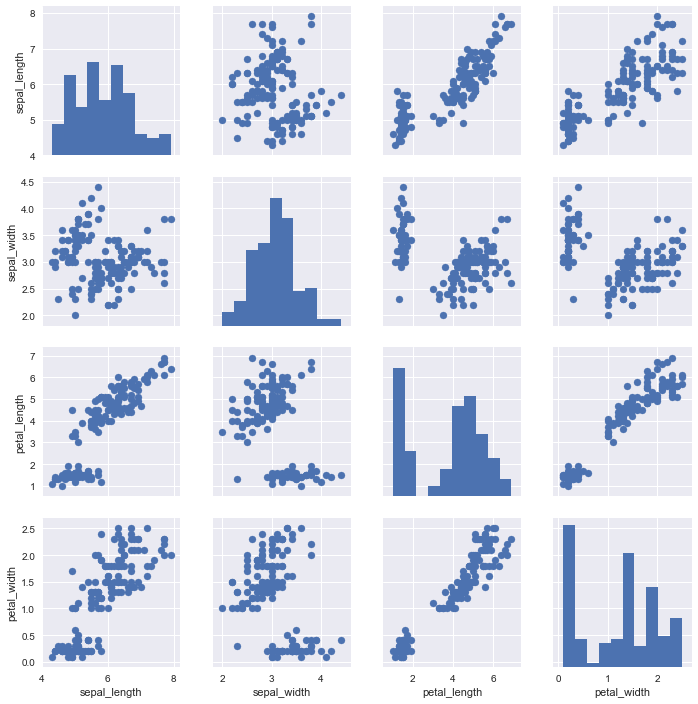

In [58]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

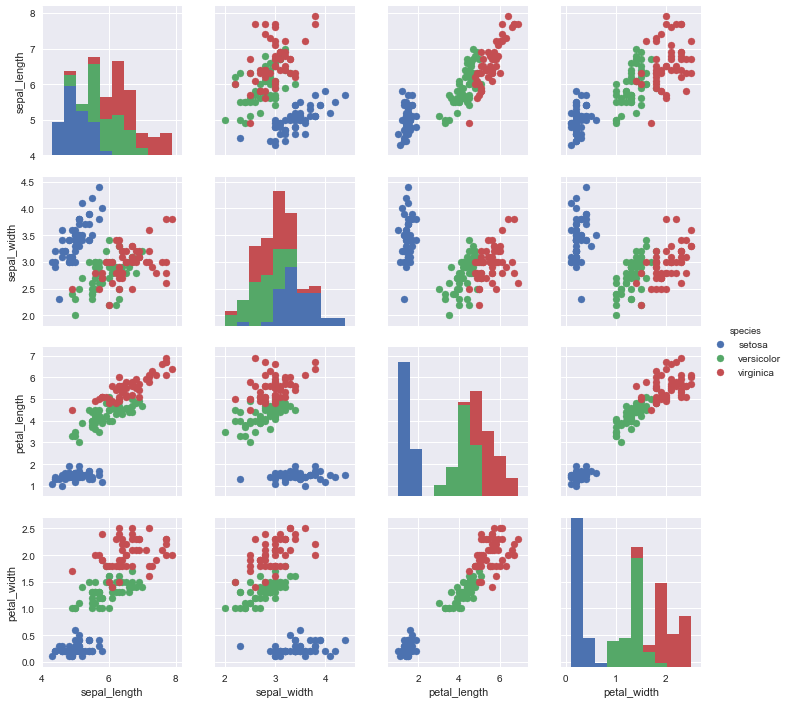

In [59]:
g = sns.PairGrid(iris, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

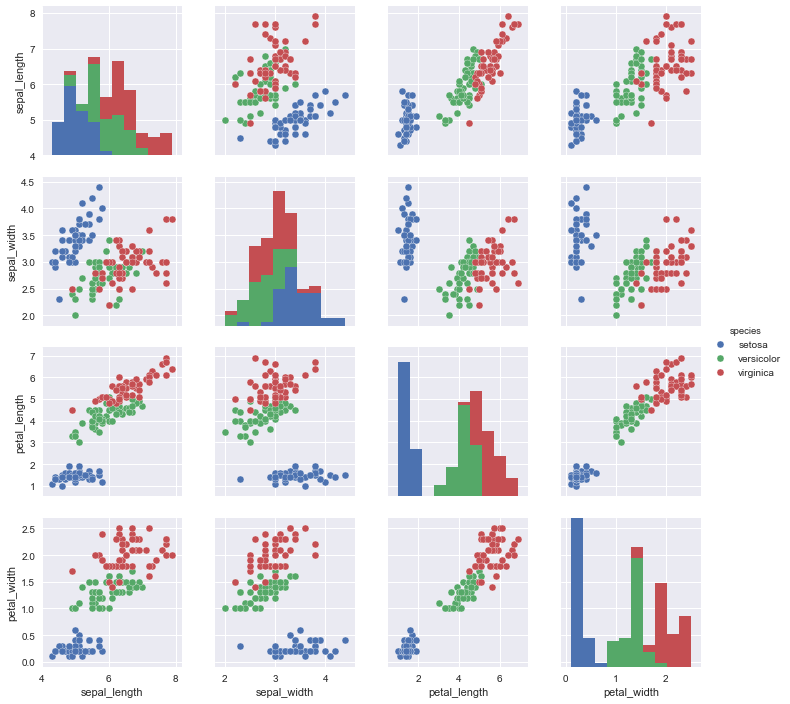

In [60]:
sns.pairplot(iris, hue="species", size=2.5);

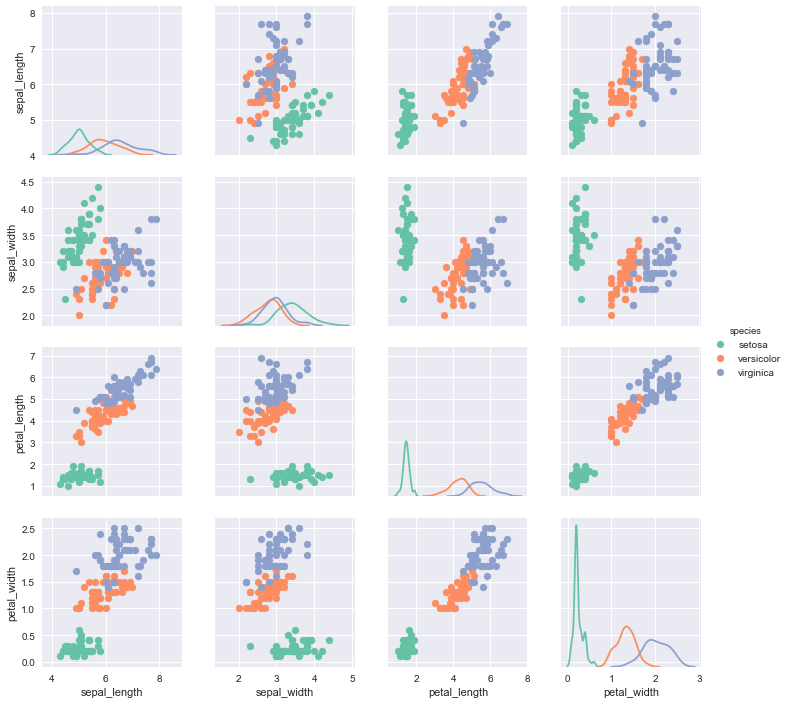

In [176]:
g = sns.PairGrid(iris, hue="species", palette="Set2", size=2.5)
g.map_diag(sns.kdeplot)
g.map_offdiag(plt.scatter)
g.add_legend();

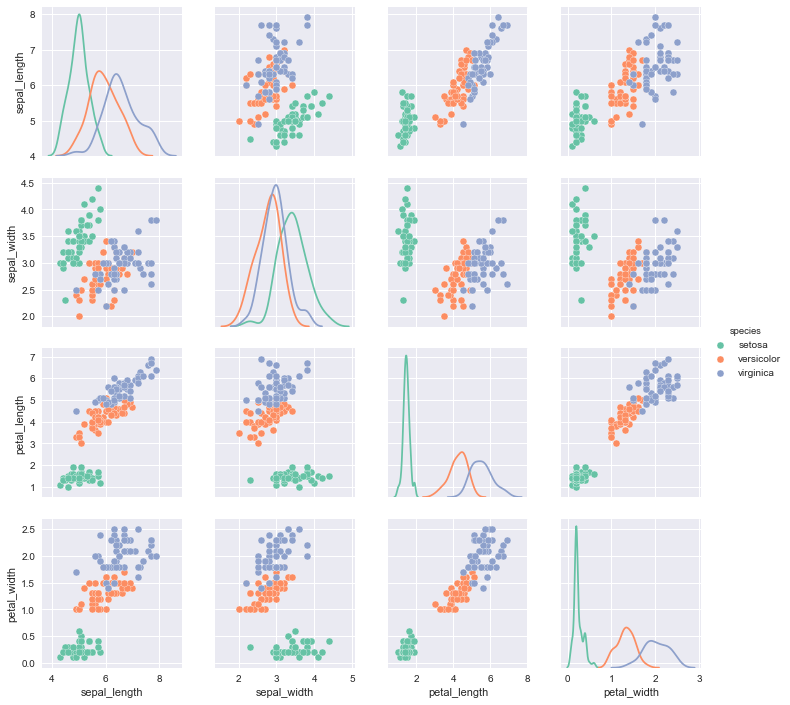

In [61]:
sns.pairplot(iris, hue="species", palette="Set2", diag_kind="kde", size=2.5);

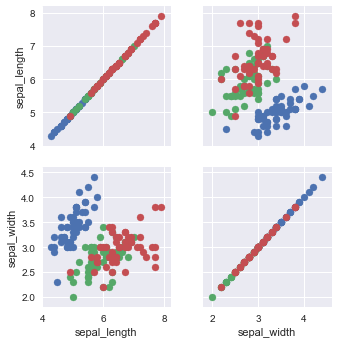

In [62]:
# 选定指定变量进行画图
g = sns.PairGrid(iris, vars=["sepal_length", "sepal_width"], hue="species")
g.map(plt.scatter);

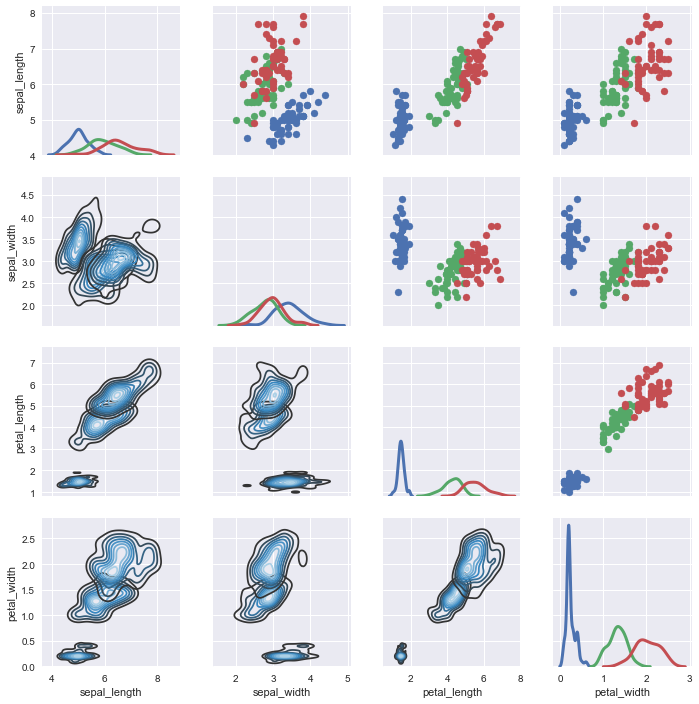

In [63]:
g = sns.PairGrid(iris,hue="species",)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_diag(sns.kdeplot, lw=3, legend=False);